@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Insurance Claims- Fraud Detection

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 





### Task

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline  

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

#### Extracting Dataset

In [3]:
#Extracting dataset and saving dataset in a variable

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [4]:
data   #display the datset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
#To check our dataset dimensions

data.shape

(1000, 40)

- The dataset contains "1000" Insurance claims(rows) and "40" features/columns

In [6]:
#Check data column names

data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Checking the DataTypes of each Column

In [7]:
data.info()  #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Our dataset contains "21" Categorical dataype columns and "19" Numerical datatype column

In [8]:
for i in data.columns:
    if data[i].dtype == 'object':
        print(i)

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


- these are the categoricaal columns

#### Checking and Treating Missing Values

In [9]:
# From the above heatmap it is clear that no null values are present.
# But sometimes the null values are present with the character like '?'.
data = data.replace('?', np.nan)

data.isna().sum()  #To check the total null values in all the columns individually

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

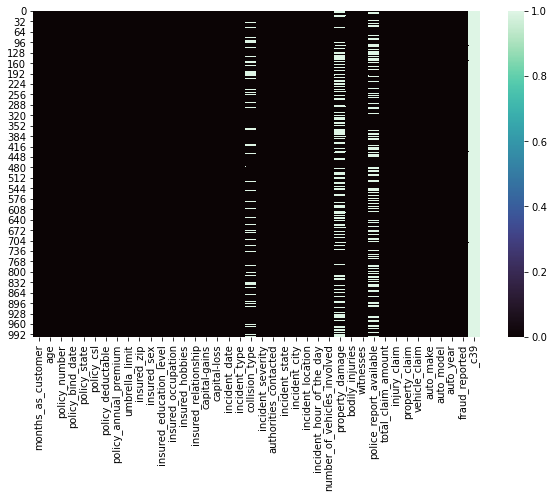

In [10]:
#Plot null values to check if any

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

In [11]:
data['_c39'].unique()

array([nan])

- Coumn: "_c39" contains only null values for the entire column, so, let's remove this column

In [12]:
data = data.drop(columns = '_c39')  #To remove "_c39" column

In [13]:
# let's check the column collision_type as it contains 178 null values.
# collison type column contain 3 unique values namely "Rear collision", "side collision", "front collision"
# we will replace the null value with most common collision type

data['collision_type'].fillna(data['collision_type'].mode()[0], inplace=True)
print(data['collision_type'].unique())

['Side Collision' 'Rear Collision' 'Front Collision']


In [14]:

# lets check for property_damage column as it contains 360 null values.
# property damage column contains only 2 values "YES" or "NO".
# we can replace the null values with "NO", assuming no property damage.

data['property_damage'].fillna('NO', inplace=True)
print(data['property_damage'].unique())

['YES' 'NO']


In [15]:

# lets check for the column police report available as it contaains 343 values.
# police_report_available contains only 2 values "YES" or "NO".
# we can replace the null values with "NO", assuming there is NO police_report_available.

data['police_report_available'].fillna('NO', inplace=True)
print(data['police_report_available'].unique())

['YES' 'NO']


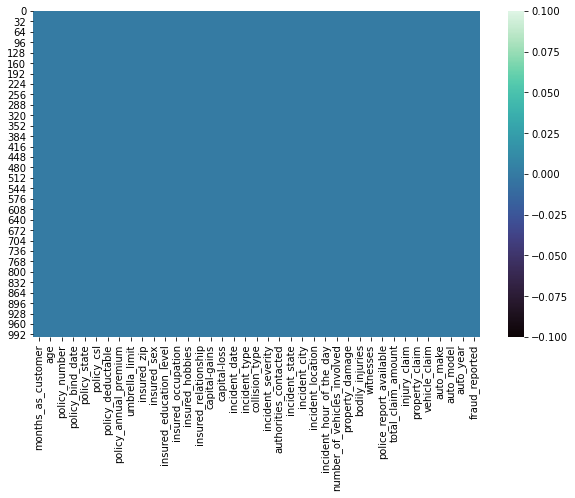

In [16]:
#Plot null values to check if any

plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='mako')
plt.show()

#### Our dataset contains no null values. Hence, let's proceed further

In [17]:
data.nunique()   #To check the total unique values present in each column


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

#### Observation: 

- We could see columns: "policy_number" and "incident_location" has unique 1000 rows and our total rows are 1000.
- Hence it means in every single row, the "policy_number" and "incident_location" are unique independently
- Conclusion: We can drop these columns from our dataset

In [18]:
#Column: "insured_zip" contains 995 unique values out of total 1000 rows, let's remove this column 
# because it would not affect in our data modeling 
# (another reason it is the postal zip code, with almost all unique features which doesn't relate in 
# confirming the fraud opportunites)

data['insured_zip'].unique()  

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

In [19]:
# As discussed, let's drop these columns from our dataset

data = data.drop(columns = ["policy_number" , "incident_location","insured_zip"])  

In [20]:
data.describe()   #To get the statistical calculation/information of each data columns

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


- 50 % Of insurance claims has "0 Capital gains"
- 'total_claim_amount','injury_claim', 'property_claim' has a large difference between their Mean and 50% median
- We have outliers and skewness which needs to be removed 

# Exploratory Data Analysis (EDA)


Let us explore our dataset features and visualize it

### Univariate Analysis

N    753
Y    247
Name: fraud_reported, dtype: int64


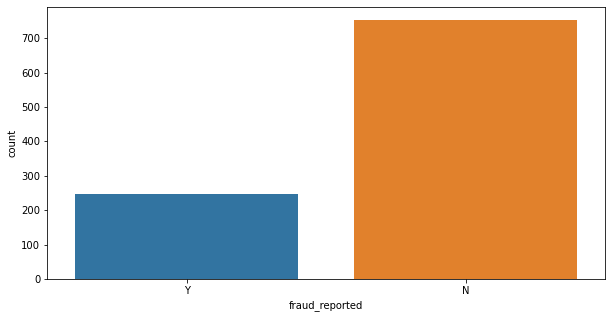

In [21]:
#Target Column: "fraud_reported"

print(data['fraud_reported'].value_counts())

plt.figure(figsize = [10,5])
sns.countplot(x='fraud_reported',data=data)
plt.show()

#### Observation:
    - Here, "753" frauds were not reported that has larger count when compared to "247" frauds reported
    - Target column: "fraud_reported" has imabalance data
    - We need to use Oversampling / Undersampling method to make our target data balanced



NO     686
YES    314
Name: police_report_available, dtype: int64


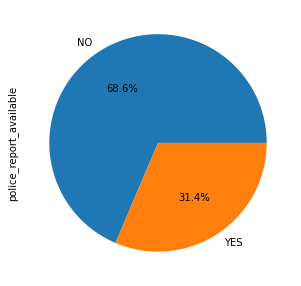

In [22]:
# "police_report_available" column

print(data['police_report_available'].value_counts())
data['police_report_available'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')
plt.show()

####  Observation:

    - Only 31.4% police_report was filed and was available to check
    - Rest 68.6% police_report was not available

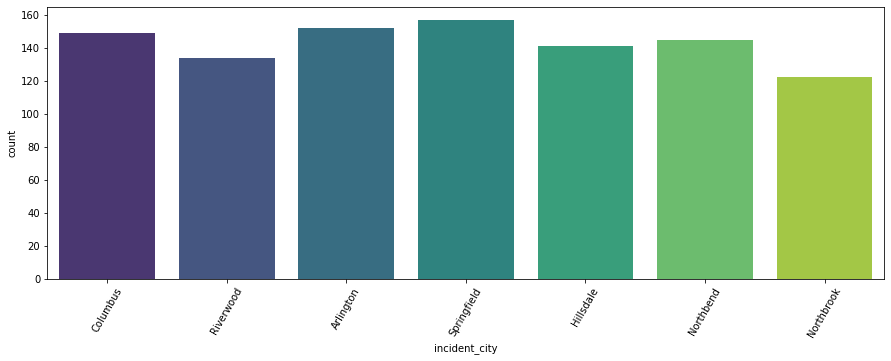

In [23]:
# "incident_city" column

plt.figure(figsize=(15,5))
sns.countplot(data['incident_city'], palette='viridis')
plt.xticks(rotation=60)
plt.show()

### Observation:
- Most of the Insurance are claimed from almost all the cities
- City "Riverwood" and "Northbrook" are the cities where less Insurance claim counts

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


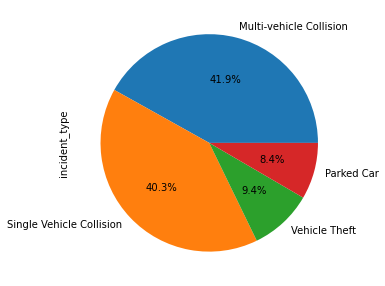

In [24]:
# Column : "incident_type"

print(data['incident_type'].value_counts())
data['incident_type'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')
plt.show()

### Observation:
- Insurace claims with Incidents are maximum due to "Single and Multi Vehicle Collision" 
- Less incident cases are come up for "Parked Cars" amd "Vehicle Thefts"

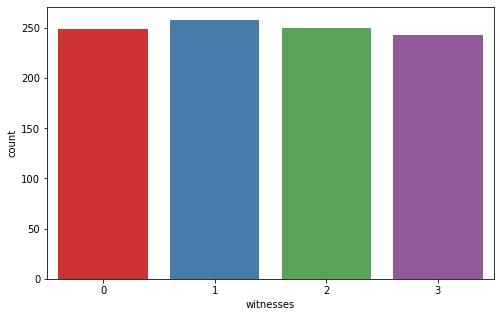

In [25]:
# "Witness" column
plt.figure(figsize=(8,5))
sns.countplot(x=data['witnesses'],palette='Set1')
plt.show()

#### Observation:
- Number of Insurance claims with Zero, one, two and three Witnesses are almost equal


### Bivariate Analysis

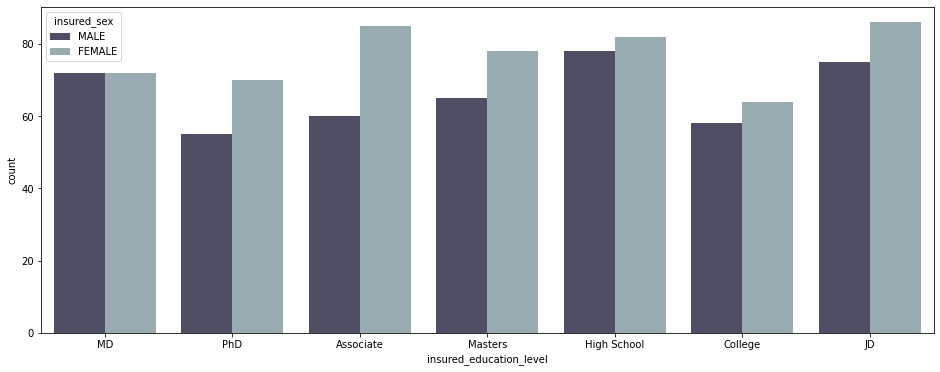

In [27]:
#Relation between "insured_education_level" and "insured_sex"

plt.figure(figsize=(16,6))
sns.countplot(data['insured_education_level'], hue=data['insured_sex'], palette='bone')
plt.show()

#### Observation:
- In all the Education-level, Female candidates have applied for Insurance claims 
- Except the Education-level, "MD", No. of Males and Females are equal who applied for insurance claim

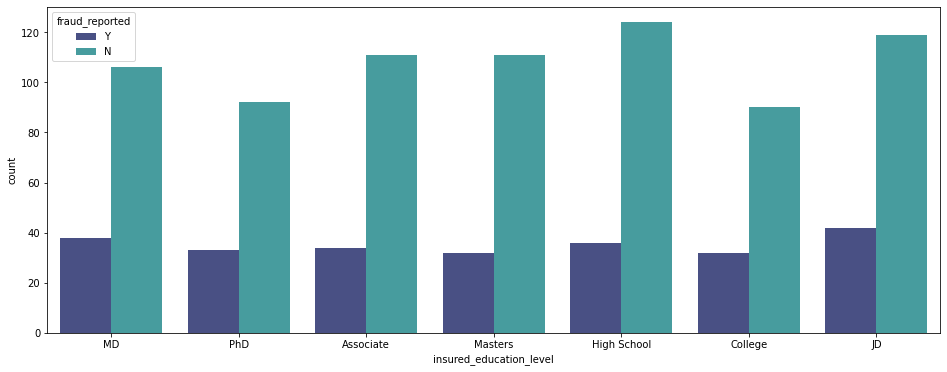

In [28]:
#Relation Between "insured_education_level" and "fraud_reported"

plt.figure(figsize=(16,6))
sns.countplot(data['insured_education_level'], hue=data['fraud_reported'], palette='mako')
plt.show()

#### Observation:
- In all the "insured_education_level", the highest number has "No Fraud Cases". It is a good sign
- But, we can't ignore that in all the "insured_education_level" there is equal number of "Frauds Reported"

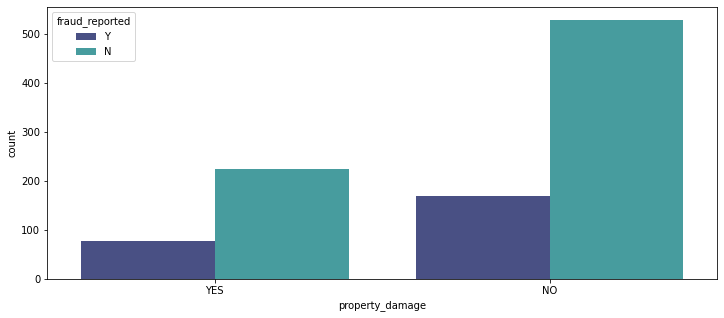

In [29]:
#Relation Between "property_damage" and "fraud_reported"

plt.figure(figsize=(12,5))
sns.countplot(data['property_damage'], hue=data['fraud_reported'], palette='mako')
plt.show()

#### Observation:
- Most "Propert_damage" cases are not reported as fraud
- And the cases without "property_damage" also has large number of frauds not reeported

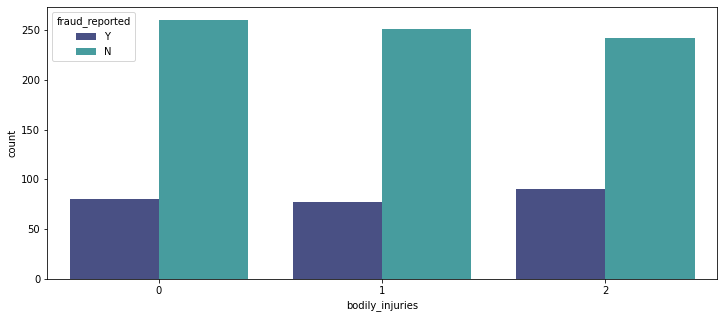

In [30]:
#Relation Between "bodily_injuries" and "fraud_reported"

plt.figure(figsize=(12,5))
sns.countplot(data['bodily_injuries'], hue=data['fraud_reported'], palette='mako')
plt.show()

#### Observation:
- In all the "bodily_injuries" irrespective zero, one and two, most of them have "No Fraud Cases". It is a good sign
- But, we can't ignore that in all the "bodily_injuries" there is equal number of "Frauds Reported"

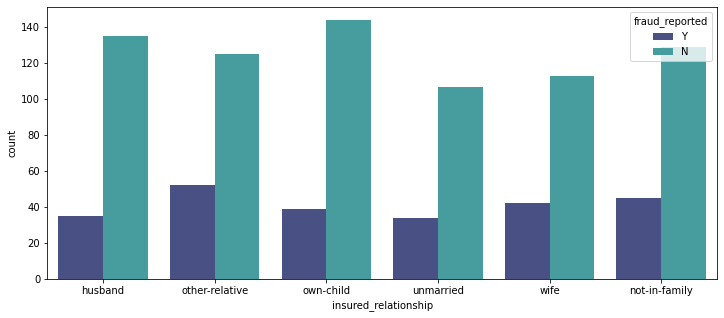

In [31]:
#Relation Between "insured_relationship" and "fraud_reported"

plt.figure(figsize=(12,5))
sns.countplot(data['insured_relationship'], hue=data['fraud_reported'], palette='mako')
plt.show()

#### Observation:
- In all the "insured_relationship" category, the highest number hasmost of them "No Fraud Cases". It is a good sign
- But, we can't ignore that in all the - In all the "insured_relationship" category, there is equal number of "Frauds Reported"

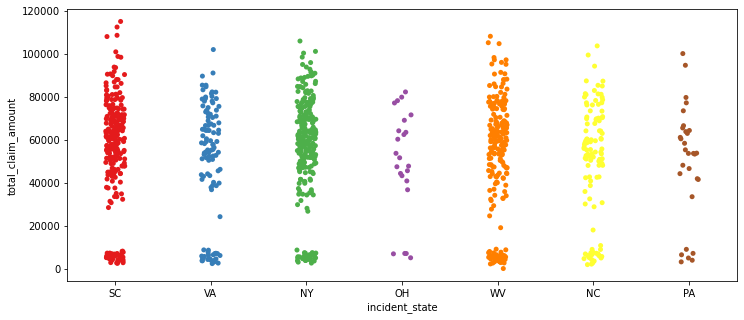

In [32]:
plt.figure(figsize=(12,5))
sns.stripplot(x=data['incident_state'], y=data['total_claim_amount'], palette='Set1')
plt.show()

#### Observation:
- Most of the incident_state has applied for Insurance total_claim_amount.
- Cities: "OH" and "PA" can be seen with less number of claims

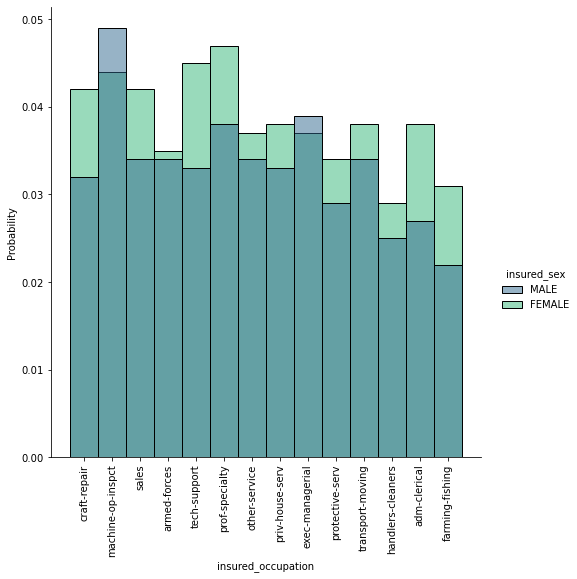

In [33]:

sns.displot(data, x="insured_occupation", hue="insured_sex", stat="probability", palette='viridis',height=7,)
plt.xticks(rotation=90)
plt.show()

#### Observation:
- Insurance claims are high in number for "Insured_occupation: Machine-op-inspect" where there are only the male candidates who has applied

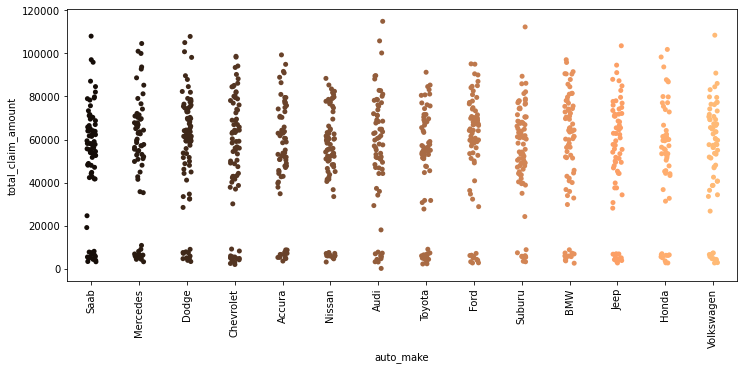

In [34]:
plt.figure(figsize=(12,5))
sns.stripplot(data['auto_make'], data['total_claim_amount'], palette='copper')
plt.xticks(rotation=90)
plt.show()

#### Observation:
- Every "auto_make" data has been involved in total_claim_amount for insurance

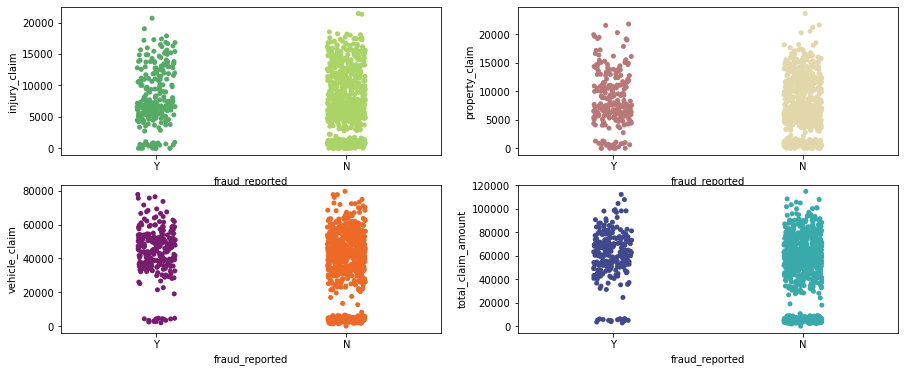

In [35]:
fig, ax = plt.subplots(2,2, figsize=(15,6))
sns.stripplot(data['fraud_reported'], data['injury_claim'], palette='summer', ax=ax[0,0])
sns.stripplot(data['fraud_reported'], data['property_claim'], palette='pink', ax=ax[0,1])
sns.stripplot(data['fraud_reported'], data['vehicle_claim'], palette='inferno', ax=ax[1,0])
sns.stripplot(data['fraud_reported'], data['total_claim_amount'], palette='mako', ax=ax[1,1])
plt.show()

#### Observation:
- All the four columns: "injury_claim", "property_claim", "vehicle_claim" and total_claim_amount"  are affecting our target column "Fraud_Reported". These 4 columns are important in predicting the model

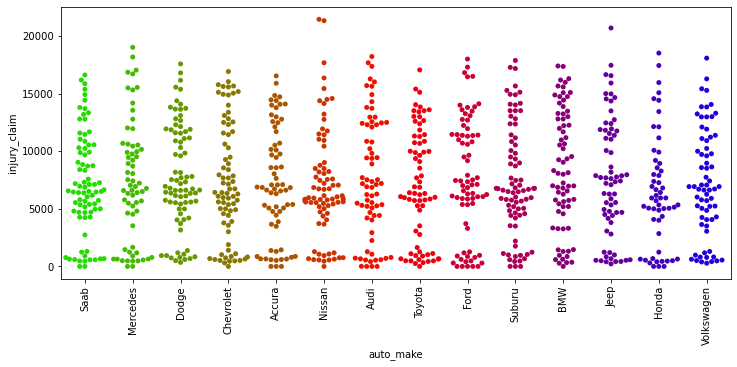

In [36]:
plt.figure(figsize=(12,5))
sns.swarmplot(data['auto_make'], data['injury_claim'], palette='brg_r')
plt.xticks(rotation=90)
plt.show()

#### Observation:
- "Nissan" of the data column: "auto_make" has made the highest injury_claim
- Then, "jeep"


<AxesSubplot:>

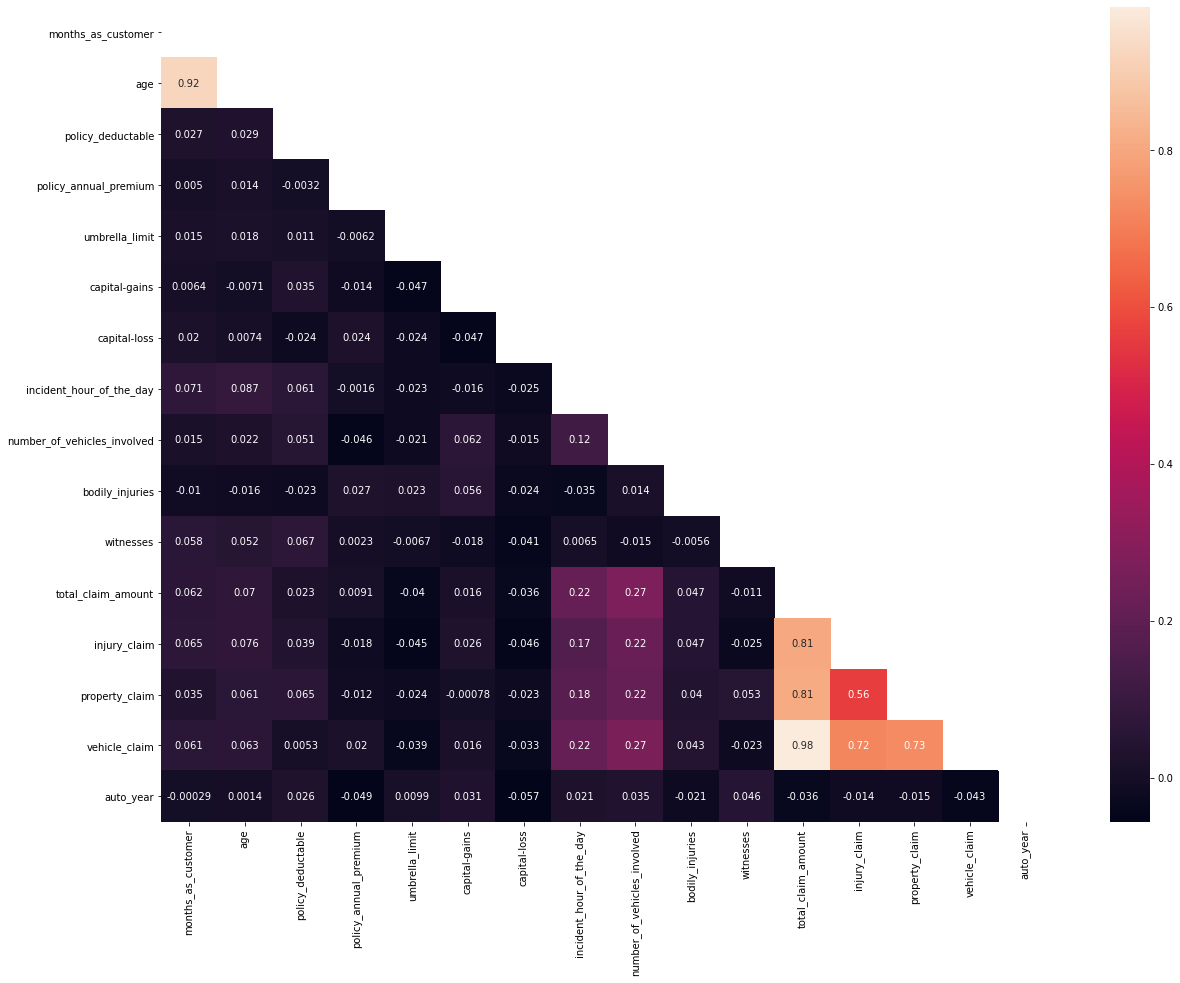

In [37]:
#correlation matrix
plt.figure(figsize=(20,15))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)

In [38]:
data.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026780,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449,-0.020527


#### Observation:
- Vehicle_claim and total_claim_amount has the high correlation with value: "0.98

### Checking For Outliers

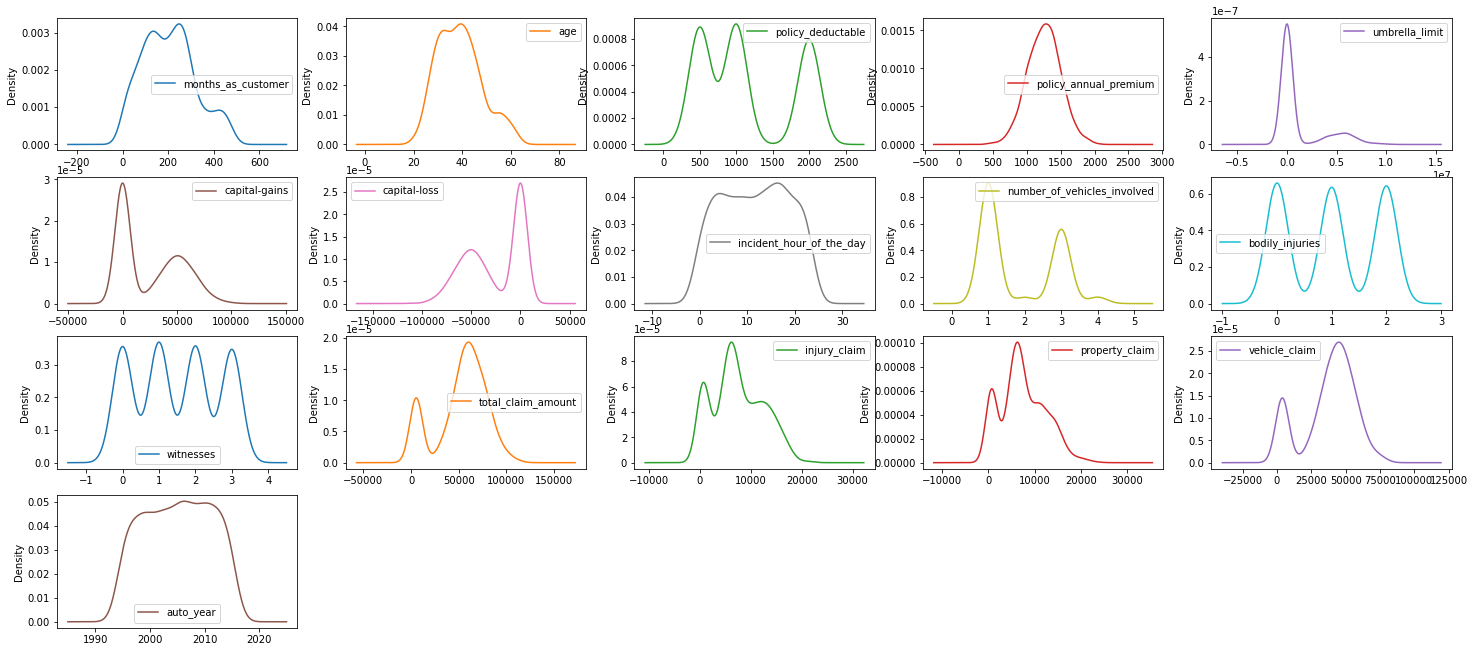

In [39]:
#Let's check how the data is distributed

data.plot(kind='density', subplots=True, layout=(7,5), sharex=False, legend=True, figsize=(25,20))
plt.show()

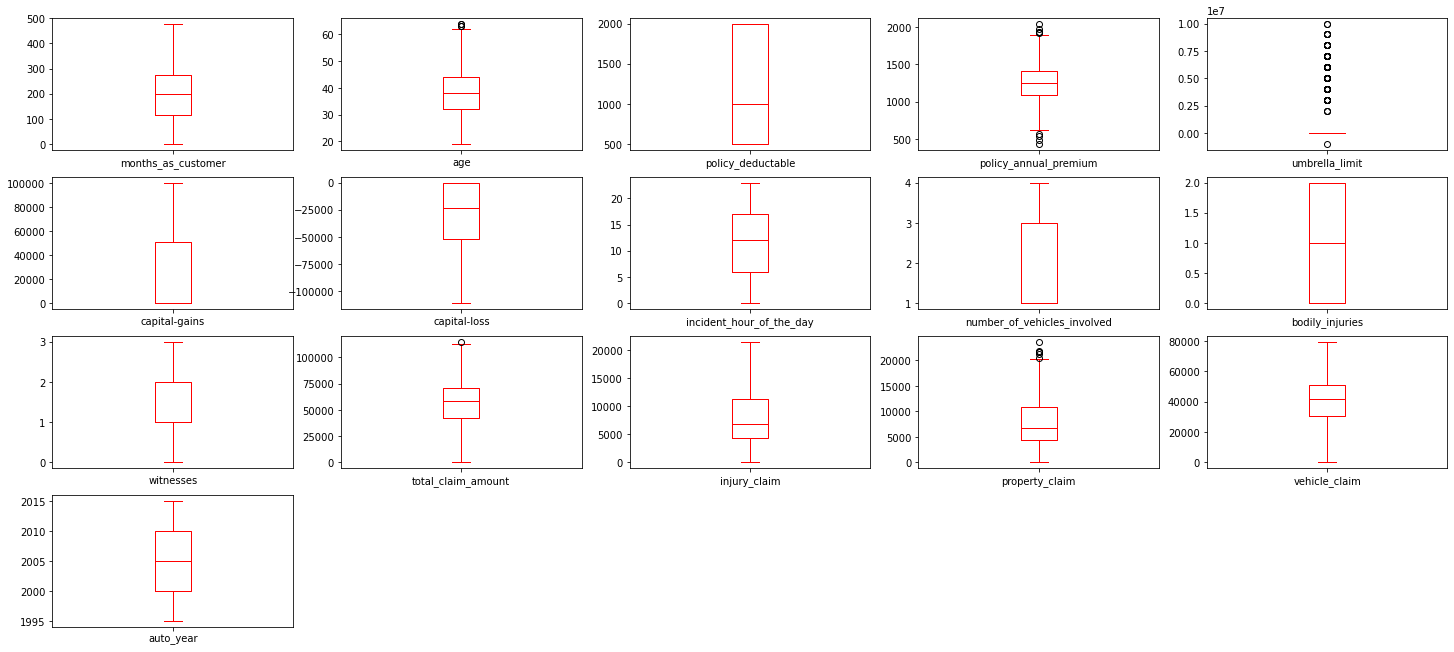

In [40]:
#Let's visualize the box plot

data.plot(kind='box', subplots=True, layout=(7,5), sharex=False, legend=True, figsize=(25,20), color = 'Red')
plt.show()

In [42]:
#We found the below Columns with Outliers by visualizing the above diagrams

outliers = ['age','policy_annual_premium','total_claim_amount','property_claim']  

Let's remove these outliers by using some techniques

#### Applying IQR Method

In [43]:
Q1 = data[outliers].quantile(0.25)
Q3 = data[outliers].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[outliers] < (Q1-1.5*IQR)) | (data[outliers]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [44]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1000, 36)
Shape After          : (996, 36)
Percentage Loss      : 0.4


#### Applying z-score Method

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(data[outliers]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [46]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (1000, 36)
Shape After          : (996, 36)
Percentage Loss      : 0.4


- The percentage loss by applying both the techniques are equal, so, let's proceed by using any one technique

In [47]:
data_new = data_new2.copy()  #data after applying th zscore method, let's copy this column

### Skewness

In [49]:
data_new.skew()  #Let's check the skewness

months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
umbrella_limit                 1.800271
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
auto_year                     -0.049276
dtype: float64

- We could see most of the skewness is present in "umbrella_limit"

- There are skewness in "total_claim_amount" and "vehicle_claim" but if we try reducing using any technique then, the skewness gets increased, so, let's leave these 2 columns as it is

In [48]:
data_new['umbrella_limit'].unique()  

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

But, we found that "umbrella_limit" is with the ordinal data , so we will ignore the skewness

### DATA ENGINEERING

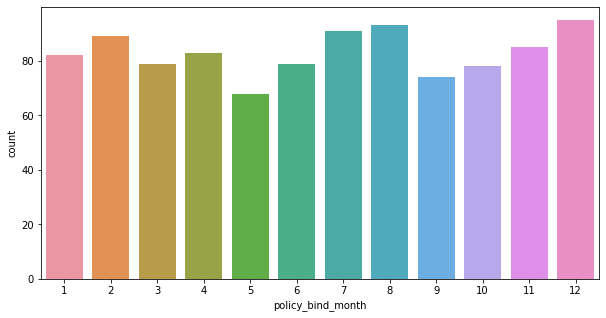

In [50]:
#extract "month" from ""policy_bind_date""

plt.figure(figsize=(10,5))

data_new['policy_bind_month'] = pd.to_datetime(data_new.policy_bind_date , format='%d-%m-%Y').dt.month  


sns.countplot(x = 'policy_bind_month', data = data_new)
plt.show()

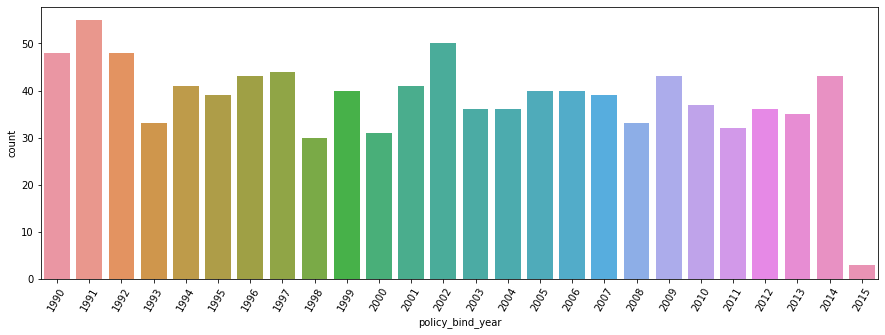

In [51]:
#extract "year" from ""policy_bind_date""

plt.figure(figsize=(15,5))

data_new['policy_bind_year'] = pd.to_datetime(data_new.policy_bind_date , format='%d-%m-%Y').dt.year  


sns.countplot(x = 'policy_bind_year', data = data_new)
plt.xticks(rotation=60)
plt.show()

In [52]:
#To remove "policy_bind_date" column as date data has been extracted in new columns

data_new = data_new.drop(columns = 'policy_bind_date')  

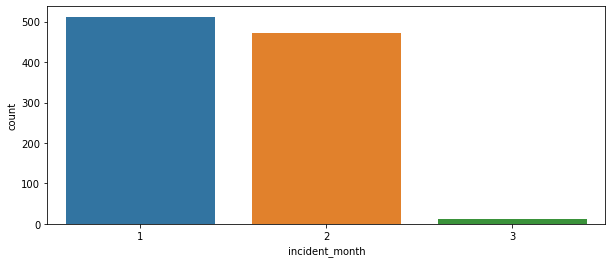

In [53]:
#extract "month" from ""incident_date""

plt.figure(figsize=(10,4))

data_new['incident_month'] = pd.to_datetime(data_new.incident_date , format='%d-%m-%Y').dt.month  

sns.countplot(x = 'incident_month', data = data_new)

plt.show()

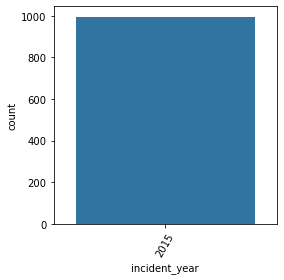

In [54]:
#extract "year" from ""incident_date""

plt.figure(figsize=(4,4))

data_new['incident_year'] = pd.to_datetime(data_new.incident_date , format='%d-%m-%Y').dt.year  

sns.countplot(x = 'incident_year', data = data_new)
plt.xticks(rotation=60)
plt.show()

In [68]:
#To remove "incident_date" column as date data has been extracted in new columns
data_new = data_new.drop(columns = 'incident_year') 

#Let's remove the year, because the whole column is with the same year: "2015"
data_new = data_new.drop(columns = 'incident_date') 

## Encoding the Categorical Columns

In [61]:
#Let's check the unique data values for each data column so that we can proceed further with data encoding features 
#and other features for our data columns

for item in data_new.columns:
    if data_new[item].dtype == 'object':
        print(item,'\n')
        print(data_new[item].unique())
        print('-'*100,'\n')

policy_state 

['OH' 'IN' 'IL']
---------------------------------------------------------------------------------------------------- 

policy_csl 

['250/500' '100/300' '500/1000']
---------------------------------------------------------------------------------------------------- 

insured_sex 

['MALE' 'FEMALE']
---------------------------------------------------------------------------------------------------- 

insured_education_level 

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
---------------------------------------------------------------------------------------------------- 

insured_occupation 

['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
---------------------------------------------------------------------------------------------------- 

insured_hobbies 

['sleepin

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
df1 = ['fraud_reported','police_report_available','property_damage','insured_sex','policy_csl']

for i in df1:
    data_new[i]=le.fit_transform(data_new[i])

In [71]:
data_new.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_month
0,328,48,OH,1,1000,1406.91,0,1,MD,craft-repair,...,6510,13020,52080,Saab,92x,2004,1,10,2014,1
1,228,42,IN,1,2000,1197.22,5000000,1,MD,machine-op-inspct,...,780,780,3510,Mercedes,E400,2007,1,6,2006,1
2,134,29,OH,0,2000,1413.14,5000000,0,PhD,sales,...,7700,3850,23100,Dodge,RAM,2007,0,9,2000,2
3,256,41,IL,1,2000,1415.74,6000000,0,PhD,armed-forces,...,6340,6340,50720,Chevrolet,Tahoe,2014,1,5,1990,1
4,228,44,IL,2,1000,1583.91,6000000,1,Associate,sales,...,1300,650,4550,Accura,RSX,2009,0,6,2014,2


In [72]:
#Let's check the unique data values for each data column so that we can proceed further with data encoding features 
#and other features for our data columns

for item in data_new.columns:
    if data_new[item].dtype == 'object':
        print(item,'\n')
        print(data_new[item].unique())
        print('-'*100,'\n')

policy_state 

['OH' 'IN' 'IL']
---------------------------------------------------------------------------------------------------- 

insured_education_level 

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
---------------------------------------------------------------------------------------------------- 

insured_occupation 

['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
---------------------------------------------------------------------------------------------------- 

insured_hobbies 

['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
-----------------------------------------------------------------

In [73]:
#Let's get dummies for the remaining categorical column

list_hot_encoded=[]
for column in data_new.columns:
    if (data_new[column].dtypes==object):
        data_new=pd.concat([data_new,pd.get_dummies(data_new[column],prefix=column)],axis=1)
        list_hot_encoded.append(column)
#drop hot-encode column
data_new=data_new.drop(list_hot_encoded,axis=1)


In [74]:
data_new #WIth the extracted data, so, let's proceed furtherwith this dataset

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1,1000,1406.91,0,1,53300,0,5,...,0,0,0,0,0,0,0,0,0,0
1,228,42,1,2000,1197.22,5000000,1,0,0,8,...,0,0,0,0,0,0,0,0,0,0
2,134,29,0,2000,1413.14,5000000,0,35100,0,7,...,0,1,0,0,0,0,0,0,0,0
3,256,41,1,2000,1415.74,6000000,0,48900,-62400,5,...,0,0,0,0,0,1,0,0,0,0
4,228,44,2,1000,1583.91,6000000,1,66000,-46000,20,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,0,0,20,...,0,0,0,0,0,0,0,0,0,0
996,285,41,0,1000,1436.79,0,0,70900,0,23,...,0,0,0,0,0,0,0,0,0,0
997,130,34,1,500,1383.49,3000000,0,35100,0,4,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2,2000,1356.92,5000000,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0


### Splitting features and labels

In [79]:
X = data_new.drop(columns = 'fraud_reported')
Y = data_new['fraud_reported']

### Balance the Imbalanced class

In [80]:
# Handiling the class having imbalance using SMOTE

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

### Scaling the data

Using the StandardScaler

In [81]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

### Finding the Best Random State

In [82]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.9233333333333333  with Random State  44


#### Splitting Training and Testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20, random_state=maxAcc) 

y_train.sample(5)

# Model Building

In [83]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import scikitplot as skplt

LogisticRegression() 

Accuracy Score: 0.8933333333333333
Avg_Cross_Validation Score:  0.8646666666666667


<Figure size 1080x432 with 0 Axes>

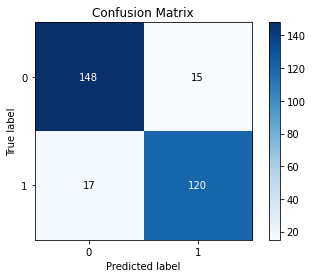

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       163
           1       0.89      0.88      0.88       137

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

------------------------------------------------------------------------------------------------------------------------ 

DecisionTreeClassifier() 

Accuracy Score: 0.8333333333333334
Avg_Cross_Validation Score:  0.8273333333333334


<Figure size 1080x432 with 0 Axes>

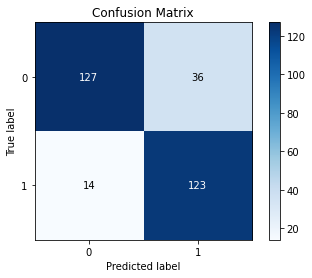

              precision    recall  f1-score   support

           0       0.90      0.78      0.84       163
           1       0.77      0.90      0.83       137

    accuracy                           0.83       300
   macro avg       0.84      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300

------------------------------------------------------------------------------------------------------------------------ 

RandomForestClassifier() 

Accuracy Score: 0.8833333333333333
Avg_Cross_Validation Score:  0.8506666666666668


<Figure size 1080x432 with 0 Axes>

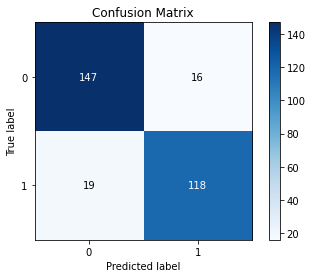

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       163
           1       0.88      0.86      0.87       137

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

------------------------------------------------------------------------------------------------------------------------ 

AdaBoostClassifier() 

Accuracy Score: 0.9033333333333333
Avg_Cross_Validation Score:  0.8633333333333333


<Figure size 1080x432 with 0 Axes>

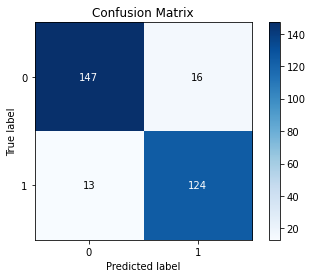

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       163
           1       0.89      0.91      0.90       137

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

------------------------------------------------------------------------------------------------------------------------ 

GradientBoostingClassifier() 

Accuracy Score: 0.9
Avg_Cross_Validation Score:  0.86


<Figure size 1080x432 with 0 Axes>

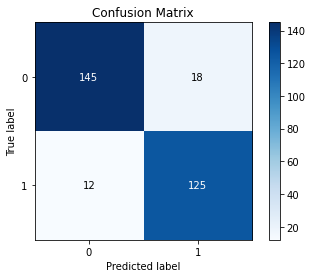

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       163
           1       0.87      0.91      0.89       137

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

------------------------------------------------------------------------------------------------------------------------ 

GaussianNB() 

Accuracy Score: 0.8633333333333333
Avg_Cross_Validation Score:  0.8246666666666667


<Figure size 1080x432 with 0 Axes>

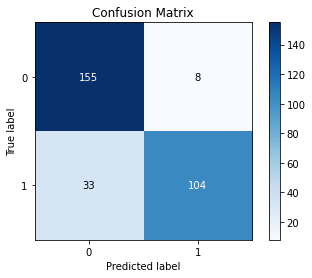

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       163
           1       0.93      0.76      0.84       137

    accuracy                           0.86       300
   macro avg       0.88      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300

------------------------------------------------------------------------------------------------------------------------ 

SVC() 

Accuracy Score: 0.87
Avg_Cross_Validation Score:  0.818


<Figure size 1080x432 with 0 Axes>

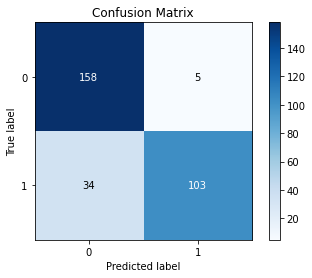

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       163
           1       0.95      0.75      0.84       137

    accuracy                           0.87       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.88      0.87      0.87       300

------------------------------------------------------------------------------------------------------------------------ 



In [186]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
gnb = GaussianNB()
svc=SVC()


models=[lr,dt,rf,ab,gb,gnb,svc]


train=[]
test=[]
cv=[]

for m in models:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=accuracy_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=accuracy_score(y_test,pred_test)
    test.append(test_score*100)

    print(m,'\n')
    print("Accuracy Score:",accuracy_score(y_test,pred_test))
    score = (cross_val_score(m,X_scaled,Y_over,cv=5)).mean()
    print('Avg_Cross_Validation Score: ',score)
    cv.append(score*100)
    
    plt.figure(figsize=[15,6])
    skplt.metrics.plot_confusion_matrix(y_test,pred_test)
    plt.show()
          
    print(classification_report(y_test,pred_test))      
    print('-'*120,'\n')
    
    
Overall_score={'Model':['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier',
                         'AdaBoostClassifier','GradientBoostingClassifier','GaussianNB','SVC'],
             'Training Score':train,
            'Test Score':test,
            'Cross Validation Score': cv}
Overall_score=pd.DataFrame(data=Overall_score)

Let's check for our Overall scores of our models:

In [187]:
Overall_score

,Model,Training Score,Test Score,Cross Validation Score
0,Logistic Regression,93.166667,89.333333,86.466667
1,DecisionTreeClassifier,100.000000,83.333333,82.733333
2,RandomForestClassifier,100.000000,88.333333,85.066667
3,AdaBoostClassifier,89.833333,90.333333,86.333333
4,GradientBoostingClassifier,96.250000,90.000000,86.000000
5,GaussianNB,87.000000,86.333333,82.466667
6,SVC,98.583333,87.000000,81.800000


In [188]:
#Let's get a new column, that shows the difference between Prediction Test R2 Score and Cross Validation Score

Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']

In [189]:
Overall_score   #display the table

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,Logistic Regression,93.166667,89.333333,86.466667,2.866667
1,DecisionTreeClassifier,100.000000,83.333333,82.733333,0.600000
2,RandomForestClassifier,100.000000,88.333333,85.066667,3.266667
3,AdaBoostClassifier,89.833333,90.333333,86.333333,4.000000
4,GradientBoostingClassifier,96.250000,90.000000,86.000000,4.000000
5,GaussianNB,87.000000,86.333333,82.466667,3.866667
6,SVC,98.583333,87.000000,81.800000,5.200000


In [190]:
Overall_score['Difference'].min()   #Find the value with least difference in "Difference Column"

0.6000000000000085

In [284]:
#Let's check the row that has the least difference value in "Difference Column"

Overall_score[Overall_score['Difference']==0.6000000000000085]

,Model,Training Score,Test Score,Cross Validation Score,Difference
1,DecisionTreeClassifier,100.0,83.333333,82.733333,0.6


    "DecisionTree Classifier" model comes up with "high accuracy score" and with least difference between the Accuracy Score and the Cross validation score

## "DecisionTree Classifier" is our best model with 83.34 % Accuracy Score

Let's Hyper tune our model to increase the accuracy score

### Hyper Tuning

In [192]:
#Importing library
from sklearn.model_selection import GridSearchCV

param_grid={'criterion': ['gini', 'entropy'],'min_samples_leaf': range(2,5),'max_depth': [None],
            'splitter':['best', 'random'],'max_features':['auto','sqrt','log2'],'min_samples_split':range(2,10,2)}

gridsearch=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']})

In [193]:
print(gridsearch.best_score_, gridsearch.best_params_)  #Let's check best parameters

0.8016666666666665 {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}


In [255]:
DT_Final = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features='auto',min_samples_leaf=2,min_samples_split=8,
                            splitter='random')

DT_Final.fit(x_train,y_train)      #train the data
y_pred = DT_Final.predict(x_test)  #predict the test data

### Performance Metrics

In [256]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))


Accuracy Score: 0.8666666666666667


Our model score increased by 3.3333 %

## Our model is now ready to predict the "Fraud Insurance Claim" with 86.67 % Accuracy 

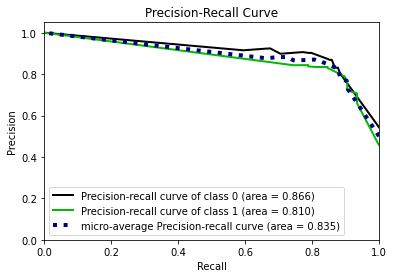

In [257]:
#Let's plot

import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a DecisionTree classifier after tuning. We'll generate probabilities on the test set.
DT_Final.fit(x_train, y_train)
probas = DT_Final.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

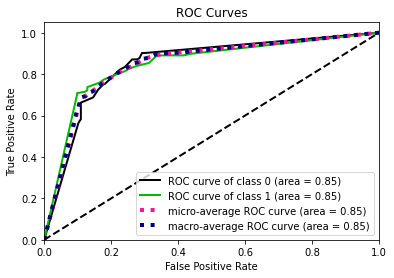

In [258]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a DecisionTree Classifier. We'll generate probabilities on the test set.
DT_Final.fit(x_train, y_train)
probas = DT_Final.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

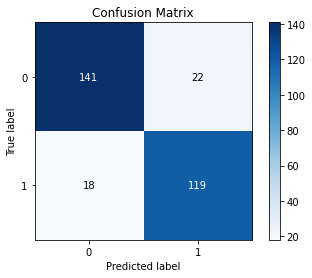

In [259]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [260]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       163
           1       0.84      0.87      0.86       137

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



## Saving Model for Future Predictions

In [261]:
import joblib
joblib.dump(DT_Final,'Insurance_claims_Fraud_detection.obj')

['Insurance_claims_Fraud_detection.obj']

### Loading the saved model to predict the data

In [262]:
#Load the saved model

loaded_model = joblib.load(open('Insurance_claims_Fraud_detection.obj','rb'))

In [263]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test,y_test) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(x_test)

Predictions

Test score: 80.00 %


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

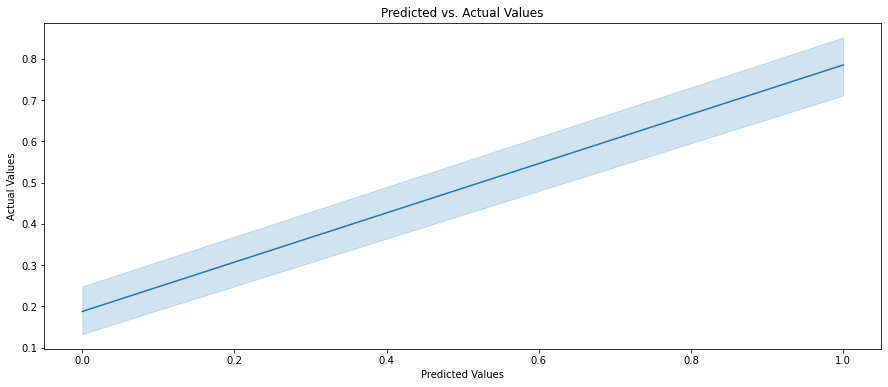

In [264]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [265]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test, Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

pd.set_option ('display.max_rows', None)  #to display maximum rows

Result

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,0,1
6,1,1
7,1,1
8,0,0
9,1,1


In [277]:
#For an example let's change the test data and find how the saved model is predicting the data

x_train1,x_test1,y_train1,y_test1 = train_test_split(X_scaled,Y_over,test_size = 0.15, random_state=42)

In [278]:
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = loaded_model.score(x_test1,y_test1) 

# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Predictions1 = loaded_model.predict(x_test1)

Predictions1

Test score: 90.22 %


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0])

    Model is predicting with 90.22% Confidence

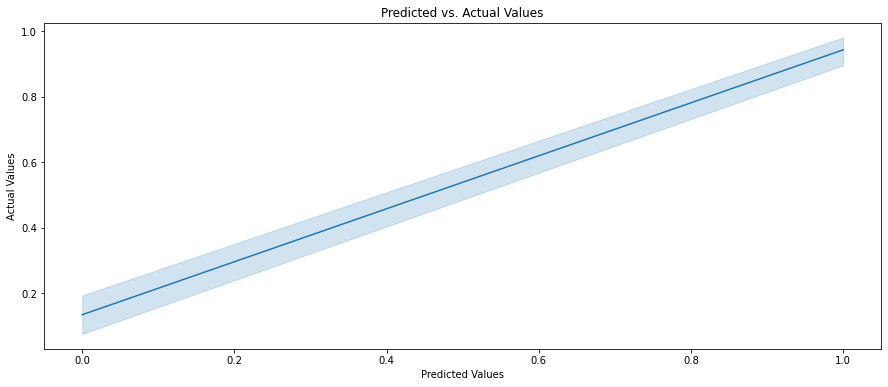

In [279]:
#plot predicted vs. actual values

plt.figure(figsize=[15,6])
sns.lineplot(x=Predictions1, y=y_test1)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

In [280]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(y_test1, Predictions1))
Result1 = pd.DataFrame(list_of_tuples,
                  columns = ['Actual', 'Predicted'])

pd.set_option ('display.max_rows', None)  #to display maximum rows

Result1

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


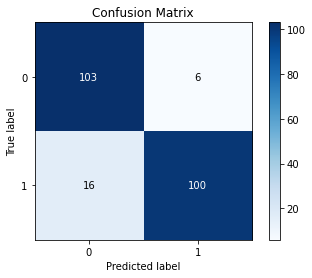

In [281]:
skplt.metrics.plot_confusion_matrix(y_test1,Predictions1)
plt.show()

In [283]:
print(classification_report(y_test1,Predictions1))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       109
           1       0.94      0.86      0.90       116

    accuracy                           0.90       225
   macro avg       0.90      0.90      0.90       225
weighted avg       0.91      0.90      0.90       225



------------

## Our model is now ready to predict the "Fraud Insurance Claim" with 86.67 % Accuracy


------------